# Описание проекта E-com.
# Шаг 1. Изучим данные.
# Шаг 2. Подготовка данных.
- Приведем к нижнему регистру названия продуктов;
- Обработаем пропуски, если есть;
- Удалим дубликаты, если есть, проверим их наличие без указания даты и времени;
- Проверим датасет на аномалии(выбросы);
- Приведем дату к нормальному виду. Найдем максимальную и минимальную дату;
- Сколько всего заказов, продуктов и клиентов в датасете;
- Определить выручку и средний чек.
# Шаг 3. Исследовательский анализ данных.
- Разделим продукты по категориям, определить доли каждой категории;
- Исследуем сезонность по месяцам, сравнить выручки и изменения категорий за одинаковые периоды;
- Исследуем продажи в рамках дня/недели;
- Посмотрим как менялись продажи в каждой категории, построим распределение по месяцам, какие категории лидируют по продажам, растут или падают;
# Шаг 4. Сегментируем покупателей по профилю потребления.
Проведем RFM-анализ. Сегментируем клиентов по :
- Времени, которое прошло с покупки (recency). Для разных продуктов давность оценивается по-своему.
- Частотности заказов (frequency): с какой периодичностью клиент возвращается к повторным/новым покупкам.
- Сумме, которую клиент тратит на продукты компании (monetary).
- Определим лояльных клиентов.
# Шаг 5. Проверим гипотезы
-Рассмотрим минимум 2 гипотезы. Необходимо пояснить: Как сформулировали нулевую и альтернативную гипотезы; Какой критерий применили для проверки гипотез и почему.
# Шаг 6. Общий вывод.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import scipy.stats as st
from datetime import datetime

# Шаг 1. Изучение данных.

In [2]:
data = pd.read_csv('/datasets/ecom_dataset_upd.csv', sep=',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [4]:
data.head(5)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


# Шаг 2. Подготовка данных

In [5]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
display(data.head(5)) # преобразовал формат секунды в привычный формат дата и время

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [6]:
data['time'] = data['date'].dt.time
display(data.sample(5))

,date,customer_id,order_id,product,quantity,price,time
882,2018-11-20 17:00:00,d0bd3cb4-d63b-4f71-9a56-8ffaa6e5f090,69065,Герань домашняя (пеларгония зональная) цветуща...,1,149.0,17:00:00
2925,2019-04-16 22:00:00,d4f984b6-ea59-4618-a26f-79a053e483c7,14653,"Цинния Оранжевый король 0,5 г 4660010770520",1,10.0,22:00:00
4986,2019-06-10 08:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Кристина ячейки по 6 шт Е6,1,120.0,08:00:00
4770,2019-06-07 10:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0,10:00:00
3917,2019-05-19 12:00:00,6148c5ec-4d6c-4977-91bd-19722d913447,14793,томата (помидор) Полосатый шоколад №65 сорт ин...,4,38.0,12:00:00


In [7]:
data['product'] = data['product'].str.lower()
data.head(5) #привел к нижнему регистру названия продуктов

,date,customer_id,order_id,product,quantity,price,time
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,00:00:00
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,00:00:00
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,00:00:00
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,00:00:00
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,00:00:00


In [8]:
data['days'] = data['date'].dt.dayofweek # добавлю столбец с днями недели
display(data.sample(5))

,date,customer_id,order_id,product,quantity,price,time,days
6321,2019-09-13 09:00:00,98e17cac-7f0b-4413-8004-d6ca648024af,72615,штора для ванной комнаты 240х200 verga белая т...,1,750.0,09:00:00,4
5886,2019-07-17 17:00:00,d7d0a3e8-70fd-4360-9c25-fc212108cac6,72021,"таз пластмассовый 18,0 л пищевой (иж), 1404047",1,194.0,17:00:00,2
1730,2019-02-07 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70140,контейнер для мусора доминик curver 25 л сереб...,10,748.0,13:00:00,3
283,2018-10-17 13:00:00,da3ab9e4-6ffa-42f8-abd1-33a1e448a555,68670,герань домашняя (пеларгония зональная) цветуща...,1,149.0,13:00:00,2
2134,2019-03-03 16:00:00,38b161da-8b0d-4053-9fb2-9b87fc961dd6,14557,пеларгония зональная диам. 12 см темнорозовая ...,1,150.0,16:00:00,6


In [9]:
data['date_without_time'] = pd.to_datetime(data['date']).dt.date
# добавил столбец с датами без времени
display(data.sample(5))

,date,customer_id,order_id,product,quantity,price,time,days,date_without_time
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"таз пластмассовый со стиральной доской (иж), 1...",1,397.0,14:00:00,3,2019-10-31
7002,2019-12-06 10:00:00,f3dfe740-5c44-45ed-98ee-97835c4769e9,101934,базилик пурпурные звезды d-7 см,1,14.5,10:00:00,4,2019-12-06
3403,2019-05-05 10:00:00,71fa654e-ce06-4cf3-bafd-2884649f23e5,71353,стремянка framar slimmy стальная 3 ступени,1,1574.0,10:00:00,6,2019-05-05
1838,2019-02-15 14:00:00,11f83991-ae0e-40bb-83ff-497f24103e75,70278,примула желтая с оранжевым в горшке d-10 см,1,127.0,14:00:00,4,2019-02-15
4681,2019-06-06 08:00:00,db77c238-3c80-4032-9e3c-c30a43f4a650,14835,бакопа ампельная мега-крупная сиреневая объем ...,1,90.0,08:00:00,3,2019-06-06


In [10]:
date_min = data['date'].min()
print(date_min)
date_max = data['date'].max()
print(date_max)

2018-10-01 00:00:00
2020-01-31 15:00:00


In [11]:
print(data.isnull().sum())

date                 0
customer_id          0
order_id             0
product              0
quantity             0
price                0
time                 0
days                 0
date_without_time    0
dtype: int64


In [12]:
print(data.duplicated().sum()) # обнаружили 0 дубликатов

0


In [13]:
duplicates_without_date = data.drop(columns=['date','time','days', 'date_without_time']).duplicated().sum()
print(duplicates_without_date) 
# обнаружено 1864 дубликата без учета даты и времени, удалю их, так как они могут сильно повлиять на результат исследования

1864


In [14]:
data = data.drop_duplicates(subset=data.columns.difference(['date', 'time', 'days', 'date_without_time']))
data.info() # удалил дубликаты

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 7473
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               5610 non-null   datetime64[ns]
 1   customer_id        5610 non-null   object        
 2   order_id           5610 non-null   int64         
 3   product            5610 non-null   object        
 4   quantity           5610 non-null   int64         
 5   price              5610 non-null   float64       
 6   time               5610 non-null   object        
 7   days               5610 non-null   int64         
 8   date_without_time  5610 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 438.3+ KB


In [15]:
grouped = data.groupby('order_id')['customer_id'].nunique().reset_index()
orders_more_one_client = grouped[grouped['customer_id'] > 1]['order_id']

orders_drop = data[data['order_id'].isin(orders_more_one_client)].index
# индексы строк для удаления

data.drop(orders_drop, inplace=True)
display(data.head())

,date,customer_id,order_id,product,quantity,price,time,days,date_without_time
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,00:00:00,0,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,00:00:00,0,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,00:00:00,0,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,00:00:00,0,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,00:00:00,0,2018-10-01


In [16]:
row_72845 = data[data['order_id'] == 72845]
display(row_72845) # проверил один из заказов, отсутвует - значит строки с зазаказами с одинаковыми клиентами удалены

,date,customer_id,order_id,product,quantity,price,time,days,date_without_time


In [17]:
print('Количество уникальных продуктов в заказе: ', data['quantity'].unique())

Количество уникальных продуктов в заказе:  [   1   10   96   15    6   11    2    4    3    5   37   64   25  150
   50   30   17    8    9    7  170   16  140   27   20   12   13   24
  100  200   57   40   45   29   23   43   14   31   59   60   18   26
  300   70  334 1000   22   80   65]


Вывод: Стоит обратить внимание, что количество уникальных продуктов в заказе может достигать больше 100 и даже 1000, необходимо проверить реальны ли эти значения.

In [18]:
display(data[data['quantity'] >= 100])

,date,customer_id,order_id,product,quantity,price,time,days,date_without_time
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,14:00:00,3,2018-10-11
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,14:00:00,3,2018-10-11
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,08:00:00,3,2018-11-01
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,11:00:00,4,2018-11-02
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"щетка для посуды *оля*, мультипласт 1807010",100,26.0,17:00:00,1,2018-12-04
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0,14:00:00,0,2018-12-10
1555,2019-01-21 09:00:00,8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,щетка для мытья посуды колибри м5202 большая,100,34.0,09:00:00,0,2019-01-21
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20.0,10:00:00,5,2019-03-23
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0,21:00:00,0,2019-05-20
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,07:00:00,1,2019-06-11


Вывод: Аномальное значение в шт. и общей стоимости имеет продукт - вантуз. Следует его удалить из данных, так как он будет вносить перекос в данные.

In [19]:
data.drop(5456, inplace=True)
display(data[data['quantity'] >= 100]) #удалил строку в датафрейме с аномалией

,date,customer_id,order_id,product,quantity,price,time,days,date_without_time
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,14:00:00,3,2018-10-11
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,14:00:00,3,2018-10-11
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,08:00:00,3,2018-11-01
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,11:00:00,4,2018-11-02
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"щетка для посуды *оля*, мультипласт 1807010",100,26.0,17:00:00,1,2018-12-04
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.0,14:00:00,0,2018-12-10
1555,2019-01-21 09:00:00,8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,щетка для мытья посуды колибри м5202 большая,100,34.0,09:00:00,0,2019-01-21
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150,20.0,10:00:00,5,2019-03-23
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0,21:00:00,0,2019-05-20
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,07:00:00,1,2019-06-11


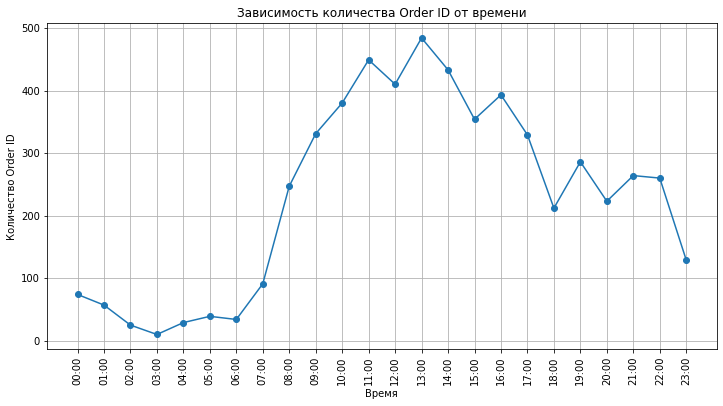

In [20]:
data['time_str'] = data['time'].apply(lambda x: f"{x.hour:02d}:{x.minute:02d}")

time_order_count = data.groupby('time_str')['order_id'].count().reset_index()
# сгруппирую данные по времени и посчитаю количество order_id

plt.figure(figsize=(12, 6))
plt.plot(time_order_count['time_str'], time_order_count['order_id'], marker='o')
plt.xlabel('Время')
plt.ylabel('Количество Order ID')
plt.title('Зависимость количества Order ID от времени')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Вывод: Активность клиентов стремительно растет в период с 6:00 до 09:00. Пик наблюдается с 12:00-14:00, это время обеденного перерыва. Далее активность планомерно снижается. 

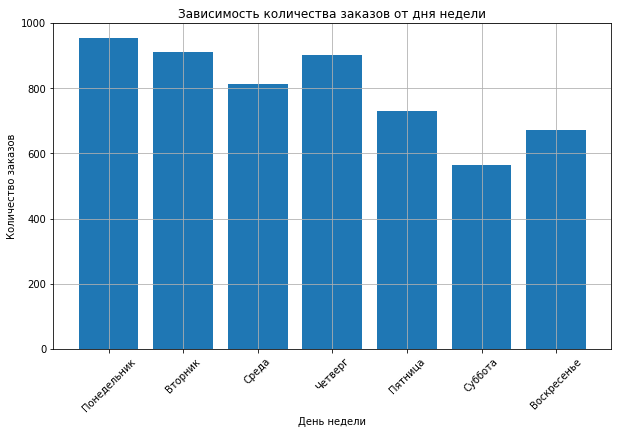

In [21]:
day_order_count = data.groupby('days')['order_id'].count().reset_index()

# Преобразование индекса дня недели в название дня недели
day_order_count['days'] = day_order_count['days'].apply(lambda x: ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'][x])

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(day_order_count['days'], day_order_count['order_id'])
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.title('Зависимость количества заказов от дня недели')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Вывод: наибольшее количество заказов в понедельник. Наименьшее количество заказов в субботу.

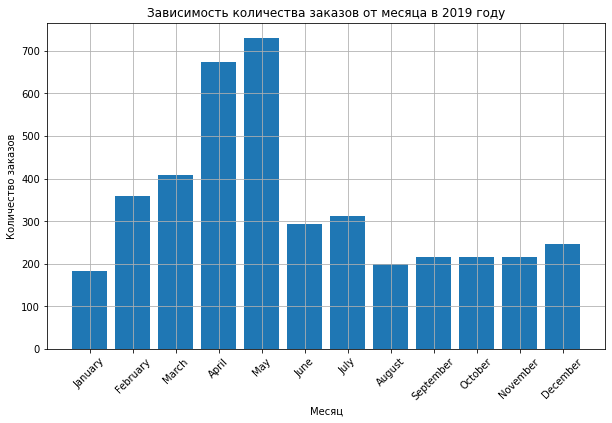

In [22]:
data_2019 = data[data['date'].dt.year == 2019]
month_order_count = data_2019.groupby(data_2019['date'].dt.month)['order_id'].count().reset_index()
# возьму данные за 2019 год, было бы актуально иметь данные еще за один полный год

month_order_count['date'] = month_order_count['date'].apply(lambda x: pd.Timestamp(2019, x, 1).strftime('%B'))
# преобразую индекс месяца в название месяца

plt.figure(figsize=(10, 6))
plt.bar(month_order_count['date'], month_order_count['order_id'])
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Зависимость количества заказов от месяца в 2019 году')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Вывод: наибольшее количество заказов в мае, до этого месяца с января идет планомерный рост, с июня продажи сильно падают. Данные за 2019 год.

In [23]:
#duplicates_without_date = data.drop(columns=['date','time','time_str','days']).duplicated().sum()
#print(duplicates_without_date) 
# обнаружено 1864 дубликата без учета даты и времени, но удалять их не будем, так как это может существенно повлиять на исследование

In [24]:
print('Всего уникальных клиентов: ', len(data['customer_id'].unique()))

Всего уникальных клиентов:  2412


In [25]:
print('Всего уникальных заказов: ', len(data['order_id'].unique()))

Всего уникальных заказов:  3491


Вывод: Аномальное значение в шт. и общей стоимости имеет продукт - вантуз. Следует его удалить из данных, так как он будет вносить перекос в данные.

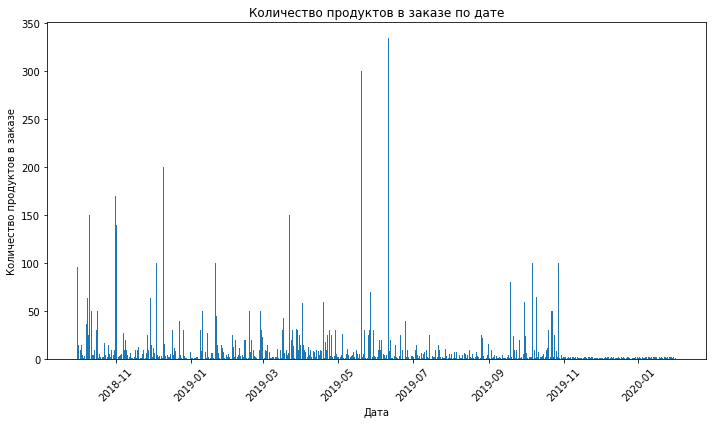

In [26]:
grouped_data = data.groupby(['quantity', 'date_without_time']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['date_without_time'], grouped_data['quantity'])
plt.xlabel('Дата')
plt.ylabel('Количество продуктов в заказе')
plt.title('Количество продуктов в заказе по дате')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
print('Среднее количество заказов на одного клиента: ', round(len(data['order_id'].unique()) / len(data['customer_id'].unique()), 2))

Среднее количество заказов на одного клиента:  1.45


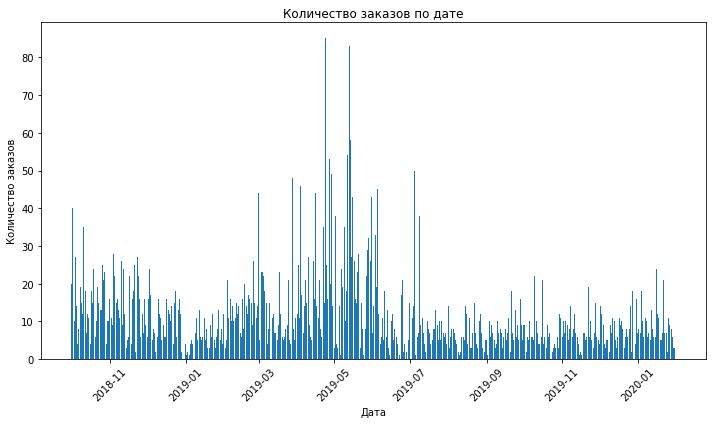

In [28]:
grouped_data = data.groupby('date_without_time').size().reset_index(name='count')
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['date_without_time'], grouped_data['count'])
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по дате')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
data['total_price'] = data['quantity'] * data['price']
display(data)

,date,customer_id,order_id,product,quantity,price,time,days,date_without_time,time_str,total_price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,00:00:00,0,2018-10-01,00:00,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,00:00:00,0,2018-10-01,00:00,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,00:00:00,0,2018-10-01,00:00,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,00:00:00,0,2018-10-01,00:00,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,00:00:00,0,2018-10-01,00:00,112.0
...,...,...,...,...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,21:00:00,3,2020-01-30,21:00,76.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,22:00:00,3,2020-01-30,22:00,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,02:00:00,4,2020-01-31,02:00,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,12:00:00,4,2020-01-31,12:00,128.0


In [30]:
print('Общая сумма продаж: ', data['total_price'].sum().round(2))

Общая сумма продаж:  3926279.42


In [31]:
print('Средний чек: ', data['total_price'].sum() / len(data['customer_id'].unique()))

Средний чек:  1627.810703427308


In [32]:
print('Средняя сумма заказа: ', data['total_price'].sum() / len(data['order_id'].unique()))

Средняя сумма заказа:  1124.6861691969827


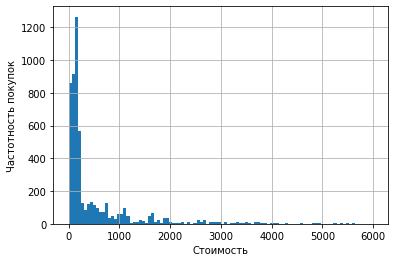

In [33]:
data['price'].hist(range=(0, 6000), bins = 100)
plt.xlabel('Стоимость')
plt.ylabel('Частотность покупок')
plt.show(); 

In [34]:
data['price'].describe()

count     5543.000000
mean       530.341707
std        973.854171
min          9.000000
25%         90.000000
50%        150.000000
75%        524.000000
max      14917.000000
Name: price, dtype: float64

In [35]:
data['total_price'].describe()

count     5543.000000
mean       708.331123
std       1656.164452
min          9.000000
25%        120.000000
50%        194.000000
75%        734.000000
max      49432.000000
Name: total_price, dtype: float64

Вывод: Больше всего клиенты покупают продукты стоимостью до 530, а общая сумма заказа в половине случаем составляет до 200. Есть продукты существенно дороже, свыше 2000, а максимальная сумма заказа составляет почти 50.000.

In [36]:
filtered_data = data[data['price'] >= 2000].sort_values(by='price', ascending=False)
filtered_data.head(5) # ознакомился с дорогими продуктами

,date,customer_id,order_id,product,quantity,price,time,days,date_without_time,time_str,total_price
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0,17:00:00,0,2019-07-29,17:00,14917.0
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,сумка-тележка хозяйственная andersen royal sho...,1,8737.0,19:00:00,4,2019-04-05,19:00,8737.0
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,сумка-тележка хозяйственная andersen alu star ...,1,8437.0,10:00:00,6,2019-02-24,10:00,8437.0
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,сумка-тележка хозяйственная rolser mnb019 rojo...,1,8077.0,16:00:00,6,2019-04-21,16:00,8077.0
7436,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,сумка-тележка хозяйственная rolser mnb019 rojo...,1,8077.0,19:00:00,6,2020-01-26,19:00,8077.0


In [37]:
#grouped = data.groupby('order_id')['customer_id'].nunique().reset_index()
# сгруппирую по order_id и посчитаю уникальных customer_id

#result = grouped[grouped['customer_id'] > 1]
# отфильтрую order_id, для которых количество уникальных customer_id больше одного

#print(result)

In [38]:
#row_72845 = data[data['order_id'] == 72845]
#display(row_72845) # проверил один из заказов

Вывод: У некоторых заказов количество клиентов больше чем 1, скорее всего это ошибка, необходимо уточнять с чем это связано.

# Шаг 3. Исследовательский анализ данных

In [39]:
data['category'] = None 

bags = 'сумк|тележк'
data.loc[data['product'].str.contains(bags, case=False, na=False), 'category'] = 'сумки'

bedroom = 'одеял|простын|подуш|плед|матрас|мыло|покрывало|спальн|наволочка'
data.loc[data['product'].str.contains(bedroom, case=False, na=False), 'category'] = 'спальня'

kitchen = 'блюдо|сковород|вилка|тарелк|ложка|фужер|посуд|кувшин|противень|кипятильник|соковыжим|лопатка|стакан|салатн|нож|бокал|чай|разделочная|венчик| \
           столов|банка|круж|толкушка|терка|варка|масл|чистка|салфет|кастрюл|webber|сахар|котел|wilmax|половник|скатерть|столовых|скалка|тортница| \
           кипят|дозатор|зажиг|губка|спираль|миска|термос|хлебница|кухон|кухн|бульон|выпеч|пресс|блюд|орехоколка|картофелемялка|электроштопор'
data.loc[data['product'].str.contains(kitchen, case=False, na=False), 'category'] = 'кухня'

bathroom = 'ванн|полотен|ёрш|ерш|зуб|вантуз|халат|подголовник|маска'
data.loc[data['product'].str.contains(bathroom, case=False, na=False), 'category'] = 'ванная комната'

storage = 'чехол|полки|вешал|плечик|стеллаж|хранен|крючок|этажерка|комод|подставка|полка|кофр|лоток'
data.loc[data['product'].str.contains(storage, case=False, na=False), 'category'] = 'хранение вещей'

plants = 'растение|пеларгония|помидор|герань|петуния|черенок|горшке|бакопа|кассете|калибрахоа|базилик|платикодон|георгина|виноград|петрушка|томат|седум|рудбекия|седун|физостегия|пиретрум|виола|тюльпан|лен| \
          лобелия|фуксия|ясколка|вербена|цветк|смесь|микс|земляника|клубника|ель|упаков|укроп|d-|камнеломка|примула|цинния|энотера|флокс|календула|вербейник|лапчатка| \
          вербейник|колокольчик|цикламен|барвинок|дыня|овсянница|папоротник|кипарис|бегония|осина|анемона|солидаго|арбуз|алиссум|монарда|космея|гвоздика|котовник|настурция|кореопсис|бадан'
data.loc[data['product'].str.contains(plants, case=False, na=False), 'category'] = 'растения'

container = 'корыт|таз|контейнер|бак|мусор|ведр|урна|корзин|бидон|ковш|коробка|емкость'
data.loc[data['product'].str.contains(container, case=False, na=False), 'category'] = 'емкости'

instrument = 'инструмент|сверел|сверло|напильник|стремянк|стяжк|шпингалет|сварка|миксер|крепеж|пружин|петл|линейк|гои|шило|штангенциркуль'
data.loc[data['product'].str.contains(instrument, case=False, na=False), 'category'] = 'инструменты'

seedlings = 'рассада| г '
data.loc[data['product'].str.contains(seedlings, case=False, na=False), 'category'] = 'рассада'

dummy = 'муляж|искусственн|композиц'
data.loc[data['product'].str.contains(dummy, case=False, na=False), 'category'] = 'муляж'

house = 'покрытие|перчат|почтов|ковр|ткан|штор|ковер|термометр|ковёр|светил|весы|фоторамка|ваза|ключница|пуф|обувница|решетка|пробк|ручка|фиксатор'
data.loc[data['product'].str.contains(house, case=False, na=False), 'category'] = 'дом'

household = 'тряп|швабр|совок|скребок|гладил|глажен|фал|ролик|прищеп|шнур|налет|антижир|насадка|пылесос|крем|стир|кашпо|щетка|сушилк|веник|антинакипин|подрукавник|совком|фен|для чистки|стирки|мыть|средство|мойк'
data.loc[data['product'].str.contains(household, case=False, na=False), 'category'] = 'хозяйственные товары'

data.sample(5)

,date,customer_id,order_id,product,quantity,price,time,days,date_without_time,time_str,total_price,category
1844,2019-02-16 17:00:00,62952c5b-e5ef-4009-a2f9-1ebff401c514,14540,пеларгония розебудная emma укорененный черенок,1,135.0,17:00:00,5,2019-02-16,17:00,135.0,растения
3973,2019-05-21 10:00:00,4856a2a7-b9d2-4243-b8d9-a96ec1425bbe,14803,капуста цветная альфа в кассете 4 штуки раннес...,1,60.0,10:00:00,1,2019-05-21,10:00,60.0,растения
1021,2018-11-29 15:00:00,79882c68-b130-4c26-bb33-38ca2f6a6533,69154,гладильная доска ника николь 9 122х40 см,1,1837.0,15:00:00,3,2018-11-29,15:00,1837.0,хозяйственные товары
6696,2019-10-26 15:00:00,2bbb6b02-0854-4094-ac4a-3d032d9fbd95,73097,"сушилка для белья потолочная лиана 1,7 м 1703006",1,562.0,15:00:00,5,2019-10-26,15:00,562.0,хозяйственные товары
798,2018-11-13 07:00:00,71129bd1-b3d1-4eb2-966e-ad3591ccf2cb,68977,"бензин для зажигалок, 1205214",1,67.0,07:00:00,1,2018-11-13,07:00,67.0,кухня


In [40]:
print(data[data['category'].isnull()]) 
# проверил наличие строк без указания категории

Empty DataFrame
Columns: [date, customer_id, order_id, product, quantity, price, time, days, date_without_time, time_str, total_price, category]
Index: []


In [41]:
print('\nСтрок без категории: {}'.format(len(data[data['category'].isnull()]))) 
# проверил сколько осталось строк без категории


Строк без категории: 0


In [42]:
category_share = data.groupby('category').agg({'total_price': 'sum'}).reset_index()
category_share.columns = ['category', 'total_price']

total_price_sum = category_share['total_price'].sum()
category_share['percent'] = (category_share['total_price'] / total_price_sum).round(3)
category_share = category_share.sort_values(by='percent', ascending=False)
category_share['percent'] = category_share['percent'].map('{:.2%}'.format)
category_share['total_price'] = category_share['total_price'].astype(int)

print(category_share)

                category  total_price percent
10  хозяйственные товары       945620  24.10%
9                  сумки       792213  20.20%
7               растения       555335  14.10%
1                    дом       354783   9.00%
4                  кухня       304560   7.80%
11        хранение вещей       245029   6.20%
2                емкости       238699   6.10%
3            инструменты       155419   4.00%
6                рассада       116468   3.00%
5                  муляж       112437   2.90%
8                спальня        54766   1.40%
0         ванная комната        50948   1.30%


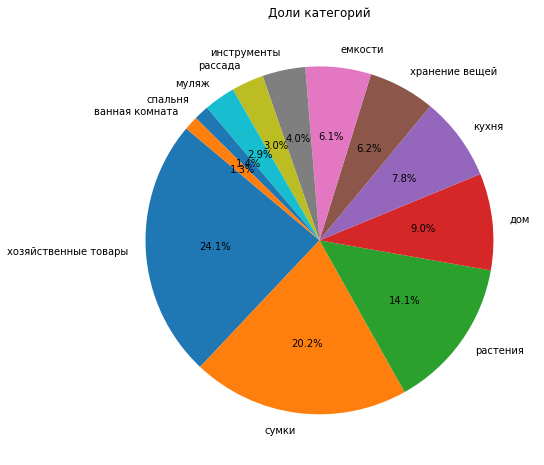

In [43]:
category_share['percent'] = category_share['percent'].str.rstrip('%').astype('float') / 100

plt.figure(figsize=(8, 8))
plt.pie(category_share['percent'], labels=category_share['category'], autopct='%1.1f%%', startangle=140, normalize=True)
plt.title('Доли категорий')
plt.show()

Вывод: получилось 12 категорий, больше всего выручка в категории хозяйственные товары и сумки, меньше всего выручка с товарами для спальни и ванной комнаты.

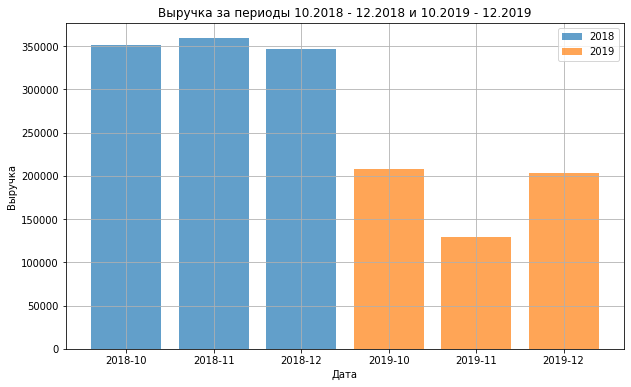

In [44]:
data_monthly = data.groupby(data['date'].dt.to_period('M')).sum().reset_index()


data_2018 = data_monthly[(data_monthly['date'].dt.year == 2018) & (data_monthly['date'].dt.month >= 10) & (data_monthly['date'].dt.month <= 12)]
data_2019 = data_monthly[(data_monthly['date'].dt.year == 2019) & (data_monthly['date'].dt.month >= 10) & (data_monthly['date'].dt.month <= 12)]
# отфильтрую данные по периодам

plt.figure(figsize=(10, 6))

plt.bar(data_2018['date'].dt.strftime('%Y-%m'), data_2018['total_price'], label='2018', alpha=0.7)
plt.bar(data_2019['date'].dt.strftime('%Y-%m'), data_2019['total_price'], label='2019', alpha=0.7)

plt.title('Выручка за периоды 10.2018 - 12.2018 и 10.2019 - 12.2019')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.grid(True)
plt.show()

Вывод: Выручка за период с 10-2019 по 12-2019 значительно снизилась по сравнению с выручкой за аналагичный период с 10-2018 по 12-2019.

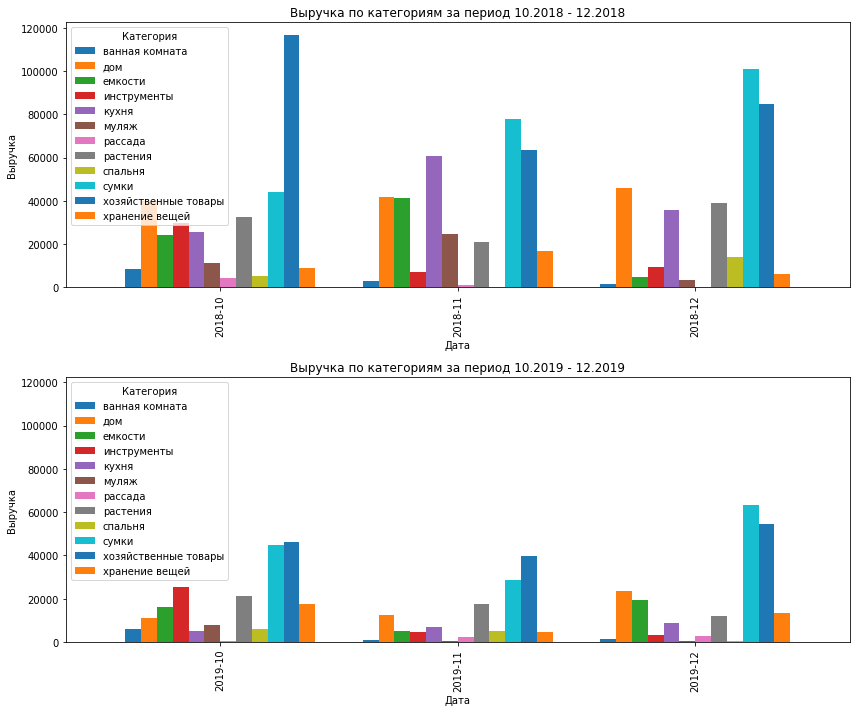

In [45]:
# сгруппирую данные по месяцам и категориям, посчитаю сумму total_price
data_monthly_category = data.groupby([data['date'].dt.to_period('M'), 'category']).sum().reset_index()

# отфильтрую данные по периодам за 2018 и за 2019 год
data_2018 = data_monthly_category[(data_monthly_category['date'].dt.year == 2018) & (data_monthly_category['date'].dt.month >= 10) & (data_monthly_category['date'].dt.month <= 12)]
data_2019 = data_monthly_category[(data_monthly_category['date'].dt.year == 2019) & (data_monthly_category['date'].dt.month >= 10) & (data_monthly_category['date'].dt.month <= 12)]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharey=True)

# график для 2018 года
data_2018.pivot(index='date', columns='category', values='total_price').plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Выручка по категориям за период 10.2018 - 12.2018')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Выручка')
axes[0].legend(title='Категория')

# график для 2019 года
data_2019.pivot(index='date', columns='category', values='total_price').plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Выручка по категориям за период 10.2019 - 12.2019')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('Выручка')
axes[1].legend(title='Категория')

plt.tight_layout()
plt.show()

Вывод: Заметно снизилась выручка в категориях хозяйственные товары, сумки, растения, кухня, дом. Практически все категории показали снижение.

# Шаг 4. Сегментировать покупателей по профилю потребления

- Времени, которое прошло с покупки. Для разных продуктов давность оценивается по-своему. Возьмем для исследования топ-1 категорию - хозяйственные товары. 

In [46]:
grouped_data = data.groupby('customer_id').agg({
    'date_without_time': 'max',  # Максимальное значение date_without_time
    'order_id': 'count',       # Количество уникальных order_id
    'total_price': 'sum'         # Сумма total_price
}).reset_index()
# cгруппирую данные

grouped_data.columns = ['customer_id', 'max_date_without_time', 'order_id_count', 'total_price_sum']
grouped_data['avg_cash_receipt'] = grouped_data['total_price_sum'] / grouped_data['order_id_count']
sorted_data = grouped_data.sort_values(by='max_date_without_time', ascending=False)

# Проверка результата
display(sorted_data.head(5))

,customer_id,max_date_without_time,order_id_count,total_price_sum,avg_cash_receipt
1928,cdd17932-623e-415f-a577-3b31312fd0e2,2020-01-31,2,727.0,363.5
433,2e460a26-35af-453d-a369-a036e95a40e0,2020-01-31,2,223.0,111.5
421,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,2020-01-31,2,953.0,476.5
2044,d99d25f1-4017-4fcd-8d29-c580cc695a1a,2020-01-30,2,1993.0,996.5
522,370ed405-57f6-4eff-ab2e-a0bacab6e982,2020-01-30,2,231.0,115.5


In [47]:
sorted_data.describe()

,order_id_count,total_price_sum,avg_cash_receipt
count,2412.000000,2412.000000,2412.000000
mean,2.298093,1627.810703,1007.602757
std,4.403284,4342.082317,1920.254056
min,1.000000,15.000000,15.000000
25%,1.000000,394.500000,200.000000
50%,1.000000,838.500000,509.000000
75%,2.000000,1799.000000,1087.000000
max,143.000000,159508.000000,49432.000000


# Оценим каждый сегмент по сумме баллов:
- Давность заказа: 1 — давние от 4-ех и больше месяцев, 2 — «спящие» - до от 2-ух до 4-ех месяцев, 3 — недавние - до 2-ух месяцев;
- Частота покупок: 1 — разовые - 1 заказ, 2 — редкие - 2 заказа, 3 — частые - 3 заказа и больше;
- Сумма покупок: 1 — низкий чек - до 500, 2 — средний чек - от 500 до 1000, 3 — высокий чек - от 1000.

In [48]:
start_date = datetime.strptime('2020-01-31', '%Y-%m-%d').date() # максимальная дата в данных, от нее вычетаем периоды

def categorize_recency(max_date):
    days_since_last_order = (start_date - max_date).days
    if days_since_last_order >= 120: 
        return '1'
    elif days_since_last_order >= 60:
        return '2'
    else:
        return '3'

sorted_data['recency'] = sorted_data['max_date_without_time'].apply(categorize_recency)

display(sorted_data.sample(5))

,customer_id,max_date_without_time,order_id_count,total_price_sum,avg_cash_receipt,recency
1916,ccb9a747-30d3-4036-8050-0384b55d7d77,2019-12-31,2,3112.0,1556.000000,3
633,42f210be-2e9c-43fa-b65a-e7891d90b98b,2019-04-16,3,434.0,144.666667,1
172,11fa97e3-7882-47f9-92fa-9a9332ec8615,2018-10-21,2,2923.0,1461.500000,1
878,5ec85e49-1721-4398-8a1f-636ca03df853,2019-12-02,2,3628.0,1814.000000,2
129,0d4d02d0-46e7-4219-aa8c-49b180d6aa30,2019-07-05,1,88.0,88.000000,1


In [49]:
sorted_data['frequency'] = pd.cut(sorted_data['order_id_count'], bins=[1, 2, 3, float('inf')], labels=['1', '2', '3'], right=False)
display(sorted_data.sample(5))

,customer_id,max_date_without_time,order_id_count,total_price_sum,avg_cash_receipt,recency,frequency
2300,f3f12a44-8b82-4850-899f-69130c366f0f,2019-09-15,1,29.0,29.0,1,1
607,3fab0e36-df21-484a-9a52-6d24890bf44f,2019-12-07,2,3585.0,1792.5,3,2
1249,8777b241-fe5c-4189-9673-599b12a6d3ab,2020-01-02,2,456.0,228.0,3,2
2346,f909dc01-f7f6-4217-a842-958e0d06c9f4,2019-04-13,2,2096.0,1048.0,1,2
181,12d7bb33-250b-4615-b609-448c4d3c945e,2019-07-17,1,1874.0,1874.0,1,1


In [50]:
sorted_data['monetary'] = pd.cut(sorted_data['avg_cash_receipt'], bins=[0, 500, 1000, float('inf')], labels=['1', '2', '3'], right=False)
display(sorted_data.sample(5))

,customer_id,max_date_without_time,order_id_count,total_price_sum,avg_cash_receipt,recency,frequency,monetary
1785,be6152d8-9303-4bd4-8f7f-0b5365f522f3,2018-12-18,1,52.0,52.00,1,1,1
1880,c90a3413-aed0-4d3c-892f-f9def8cc50f2,2019-08-27,1,164.0,164.00,1,1,1
1938,cf2b0635-67bb-423b-85a4-a342c58bd1ca,2019-11-27,2,456.0,228.00,2,2,1
39,036d75ea-b633-41a8-8974-3f84fee8c65e,2019-12-23,2,2743.5,1371.75,3,2,3
916,62f1e9ea-c828-4287-b234-86f56491201a,2019-04-23,1,475.0,475.00,1,1,1


# С помощью суммы значений столбцов: recency, frequency и monetary, можем сегментировать клиентов.
- Если сумма значений = 3 - потерянные клиенты, от 4-5 - потерянные лояльные клиенты, 6-7 - лояльные клиенты, 8-9 - VIP клиенты.
Можно сделать более детальную сегментацию, для этого нужно будет выявить сезонность в продуктах и исследовать эти периоды и поведение клиентов в них, возможно есть постоянные клиенты, которые из года в год покупают рассаду только в нашем магазине, возможно есть клиенты, которые покупают новые сумки перед каждым путешествием только в нашем магазине.

In [51]:
sorted_data['total_segment'] = sorted_data['recency'].astype(int) + sorted_data['frequency'].astype(int) + sorted_data['monetary'].astype(int)
# создам столбец 'total_segment'

def segment_name(row):
    if row['total_segment'] == 3:
        return 'потерянные клиенты'
    elif 3 < row['total_segment'] <= 5:
        return 'потерянные лояльные клиенты'
    elif 5 < row['total_segment'] <= 7:
        return 'лояльные клиенты'
    else:
        return 'VIP клиенты'

sorted_data['segment_name'] = sorted_data.apply(segment_name, axis=1)
display(sorted_data.sample(5))

,customer_id,max_date_without_time,order_id_count,total_price_sum,avg_cash_receipt,recency,frequency,monetary,total_segment,segment_name
1809,c09b95c0-8db5-4dc1-867f-ddd546a90284,2019-06-12,1,208.0,208.000000,1,1,1,3,потерянные клиенты
1076,73be0af1-ade8-4da1-b74f-dd831103bf57,2020-01-12,2,4490.0,2245.000000,3,2,3,8,VIP клиенты
1254,87b754ae-0f9f-4bbf-8769-9117d6ecf109,2019-08-15,1,577.0,577.000000,1,1,2,4,потерянные лояльные клиенты
765,52aff75c-a972-4c25-bad5-dfe6a48cd981,2018-11-25,9,665.0,73.888889,1,3,1,5,потерянные лояльные клиенты
959,671f78ce-18ec-4017-9848-519963be6b99,2019-05-13,1,284.0,284.000000,1,1,1,3,потерянные клиенты


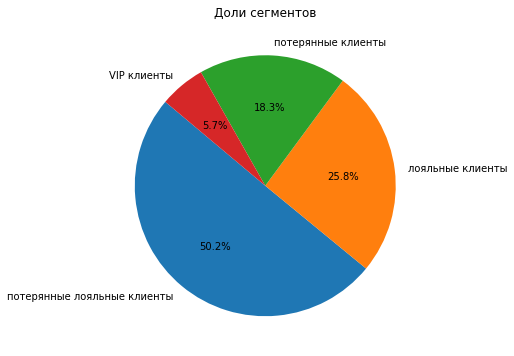

In [52]:
segment_counts = sorted_data['segment_name'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Доли сегментов')
plt.show()

Вывод: На графике видно, что у нас достаточно большая база активных клиентов - больше 33% , потерянных клиентов почти 17% и 50% клиентов, среди которых есть те, которых можно вернуть в наш магазин и не потерять.

# Рассмотрю подробней категорию "хозяйственные товары"

In [53]:
household_products = data[data['category'] == 'хозяйственные товары']
grouped_products = household_products.groupby('product')['total_price'].sum().reset_index()
top_5_household_products = grouped_products.sort_values(by='total_price', ascending=False).head(5)
top_5_household_products

,product,total_price
169,сушилка meliconi stendy junior,27970.0
11,"веник сорго с деревянной ручкой с 4-мя швами, ...",20550.0
37,гладильная доска sarayli new elegant 125x45 см,17843.0
53,гладильная доска ника blues 124х46 см 5757,17786.0
280,сушилка уличная leifheit 85210 linomatic v 400...,14917.0


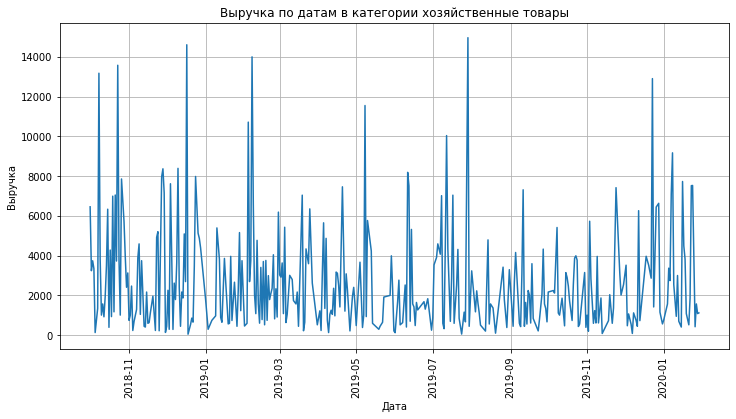

In [54]:
household_products = data[data['category'] == 'хозяйственные товары']
# отфильтрую данные по категории "хозяйственные товары"

grouped_household_data = household_products.groupby('date_without_time')['total_price'].sum().reset_index()
# сгруппирую данные по столбцу `date` и суммирую `total_price` для каждой даты

plt.figure(figsize=(12, 6))
plt.plot(grouped_household_data['date_without_time'], grouped_household_data['total_price'])

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка по датам в категории хозяйственные товары')
plt.xticks(rotation=90) 
plt.grid(True)
plt.show()

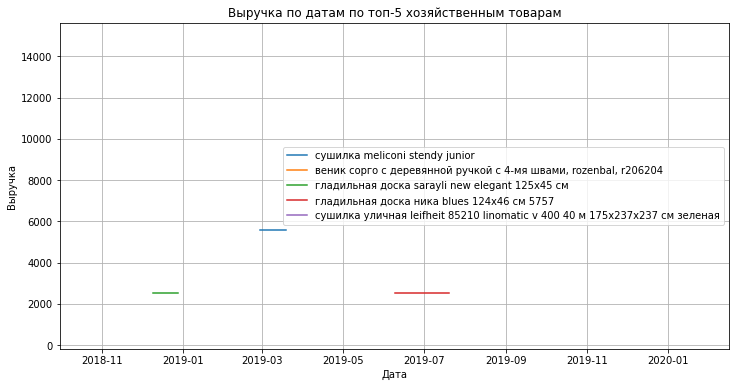

In [55]:
# сортирую данные по сумме `total_price`
top_5_household_products = grouped_products.sort_values(by='total_price', ascending=False).head(5)

# список топ 5 хозяйственных продуктов
top_5_products = top_5_household_products['product'].tolist()
top_5_data = household_products[household_products['product'].isin(top_5_products)]
grouped_top_5_data = top_5_data.groupby(['date_without_time', 'product'])['total_price'].sum().unstack()

plt.figure(figsize=(12, 6))
for product in top_5_products:
    plt.plot(grouped_top_5_data.index, grouped_top_5_data[product], label=product)

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка по датам по топ-5 хозяйственным товарам')
plt.legend()
plt.grid(True)
plt.show()

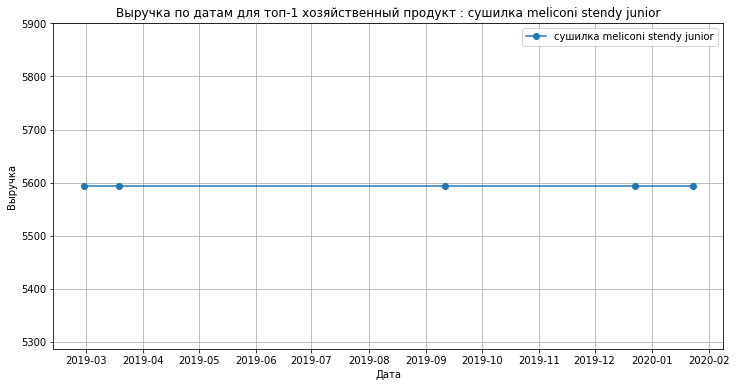

In [56]:
# отсортирую данные по сумме `total_price`
top_1_household_product = grouped_products.sort_values(by='total_price', ascending=False).head(1)

# топ 1 хозяйственный продукт по выручке
top_product_name = top_1_household_product['product'].iloc[0]
top_product_data = household_products[household_products['product'] == top_product_name]
grouped_top_product_data = top_product_data.groupby('date_without_time')['total_price'].sum()

plt.figure(figsize=(12, 6))
plt.plot(grouped_top_product_data.index, grouped_top_product_data.values, label=top_product_name, marker='o')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title(f'Выручка по датам для топ-1 хозяйственный продукт : {top_product_name}')
plt.legend()
plt.grid(True)
plt.show()

Вывод: При детальном рассмотрении можно увидеть, что гладильная доска продавалась не так часто, возможно в какие-то периоды ее не было в продаже, и только в мае-июне наблюдается рост ее продаж. Скорее всего если исследовать каждую категори и каждый продукт будут наблюдаться равные графики за весь период и линейные графики на коротких отрезках. Кроме того, есть продукты каждодневного спроса, а как в нашем случае - гладильная доска, которая покупается не каждый день, а только в случае необходимости.

- Частотность заказов (frequency): с какой периодичностью клиент возвращается к повторным/новым покупкам.

In [57]:
customer_count_category = data.groupby('category')['customer_id'].nunique().reset_index()
customer_count_category.columns = ['category', 'unique_customer_count']
print(customer_count_category.sort_values(by='unique_customer_count', ascending=False))

                category  unique_customer_count
7               растения                    808
10  хозяйственные товары                    596
4                  кухня                    311
9                  сумки                    309
1                    дом                    279
6                рассада                    211
5                  муляж                    209
2                емкости                    201
11        хранение вещей                    163
0         ванная комната                     79
3            инструменты                     78
8                спальня                     27


In [58]:
customer_id_counts = data.groupby(['category', 'customer_id']).size().reset_index(name='count')
# сгруппируем данные по категории и customer_id

one_customer_ids = customer_id_counts[customer_id_counts['count'] == 1]
# оставлю только те записи, где count = 1

one_customer_count_by_category = one_customer_ids.groupby('category')['customer_id'].count().reset_index()
one_customer_count_by_category.columns = ['category', 'one_customer_count']

print(one_customer_count_by_category.sort_values(by='one_customer_count', ascending=False))

                category  one_customer_count
7               растения                 523
10  хозяйственные товары                 517
9                  сумки                 286
4                  кухня                 277
1                    дом                 245
5                  муляж                 183
2                емкости                 177
11        хранение вещей                 148
6                рассада                 106
0         ванная комната                  73
3            инструменты                  69
8                спальня                  27


In [59]:
two_customer_ids = customer_id_counts[customer_id_counts['count'] == 2]
# оставлю только те записи, где count = 2

two_customer_count_by_category = two_customer_ids.groupby('category')['customer_id'].count().reset_index()
# сгруппирую данные для повторных customer_id по категориям

two_customer_count_by_category.columns = ['category', 'two_customer_count']

print(two_customer_count_by_category.sort_values(by='two_customer_count', ascending=False))

                category  two_customer_count
7               растения                 115
9   хозяйственные товары                  68
1                    дом                  28
6                рассада                  24
4                  кухня                  23
8                  сумки                  18
5                  муляж                  14
10        хранение вещей                  12
2                емкости                  10
3            инструменты                   7
0         ванная комната                   4


In [60]:
three_customer_ids = customer_id_counts[customer_id_counts['count'] >= 3]
# оставлю только те записи, где count >= 3

three_customer_count_by_category = three_customer_ids.groupby('category')['customer_id'].count().reset_index()
three_customer_count_by_category.columns = ['category', 'three_customer_count']

print(three_customer_count_by_category.sort_values(by='three_customer_count', ascending=False))

                category  three_customer_count
7               растения                   170
6                рассада                    81
2                емкости                    14
5                  муляж                    12
4                  кухня                    11
9   хозяйственные товары                    11
1                    дом                     6
8                  сумки                     5
10        хранение вещей                     3
0         ванная комната                     2
3            инструменты                     2


Вывод: Чаще всего постоянные клиенты встречаются в категории растения, хозяйственные товары, рассада.

- Сумма, которую клиент тратит на продукты компании. Определим лояльных клиентов. Исследуем топ-10 клиентов по выручке, совершивших 2 и более покупки за все время.

In [61]:
customer_order_count = data.groupby('customer_id')['order_id'].nunique().reset_index()
customer_order_count.columns = ['customer_id', 'order_count']
# количество order_id для каждого customer_id

filtered_customers = customer_order_count[customer_order_count['order_count'] >= 2]
# отфильтрую customer_id с order_count >= 2

filtered_data = pd.merge(filtered_customers, data, on='customer_id', how='left')
# объединю отфильтрованных customer_id с исходными данными

customer_total_price = filtered_data.groupby('customer_id')['total_price'].sum().reset_index()
# сумма total_price для каждого customer_id

top_10_customers = customer_total_price.sort_values(by='total_price', ascending=False).head(10)
# отсортирую данные по сумме total_price и выберу топ-10 клиентов

customer_category_count = filtered_data.groupby('customer_id')['category'].nunique().reset_index()
customer_category_count.columns = ['customer_id', 'category_count']
# посчитаю количество уникальных категорий для каждого customer_id

top_10_customers_with_counts = pd.merge(top_10_customers, customer_order_count, on='customer_id', how='left')
top_10_customers_with_counts = pd.merge(top_10_customers_with_counts, customer_category_count, on='customer_id', how='left')
# объединю данные о топ-10 customer_id с данными о количестве order_id и category_count

display(top_10_customers_with_counts)

,customer_id,total_price,order_count,category_count
0,c971fb21-d54c-4134-938f-16b62ee86d3b,159508.0,126,10
1,4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.0,35,12
2,58a4c3cc-504f-43ea-a74a-bae19e665552,53232.0,2,1
3,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900.0,4,4
4,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21361.0,17,6
5,940c175f-ea87-44e0-9e16-0a3d0a9abecd,20232.0,2,2
6,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,16557.0,2,2
7,ad66d870-22f5-43bc-958f-73420822586b,13731.0,2,2
8,639c4989-b0ab-412a-b7ec-be394cb2d372,12095.0,3,2
9,86c97bf1-c834-423e-9e38-8acda68f97e8,11548.0,2,1


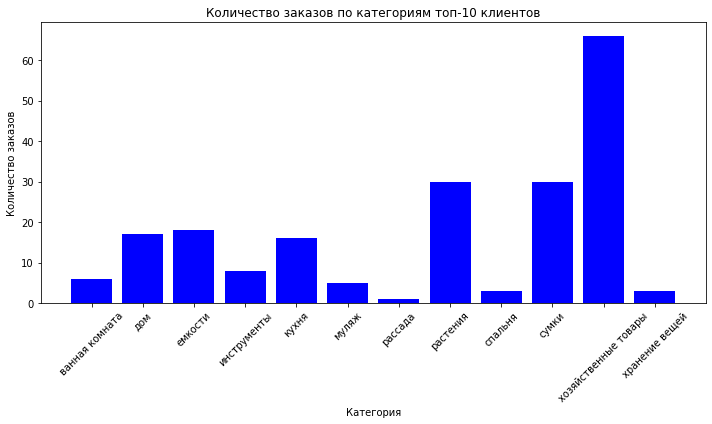

In [62]:
top_10_customers_with_counts = pd.merge(top_10_customers, customer_order_count, on='customer_id', how='left')
top_10_customers_with_counts = pd.merge(top_10_customers_with_counts, customer_category_count, on='customer_id', how='left')
# объединю данные топ-10 customer_id с данными о количестве order_id и category_count

top_10_categories = pd.merge(top_10_customers_with_counts, filtered_data, on='customer_id', how='left')
category_order_count = top_10_categories.groupby('category')['order_id'].nunique().reset_index()
category_order_count.columns = ['category', 'order_count']

plt.figure(figsize=(10, 6))
plt.bar(category_order_count['category'], category_order_count['order_count'], color='blue')
plt.xlabel('Категория')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по категориям топ-10 клиентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод: Больше всего повторных заказов в категории хозяйственные товары, далее это растения и сумки.

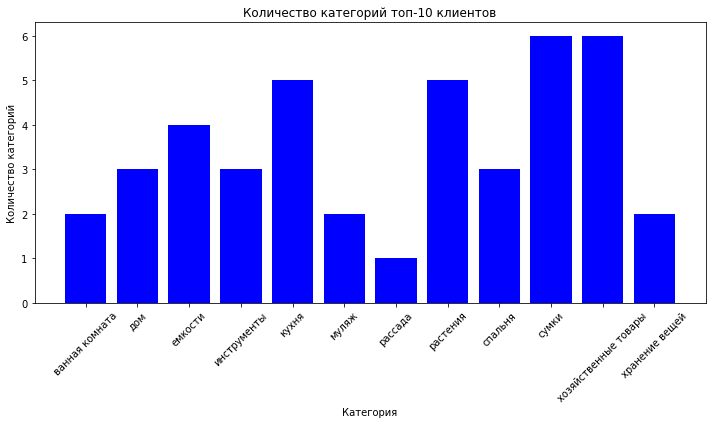

In [63]:
top_10_categories = pd.merge(top_10_customers_with_counts, filtered_data, on='customer_id', how='left')
category_count_data = top_10_categories.groupby('category')['customer_id'].nunique().reset_index()
category_count_data.columns = ['category', 'category_count']

plt.figure(figsize=(10, 6))
plt.bar(category_count_data['category'], category_count_data['category_count'], color='blue')
plt.xlabel('Категория')
plt.ylabel('Количество категорий')
plt.title('Количество категорий топ-10 клиентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод: Категория в которой преобладает наибольшее количество повторных заказов - сумки, далее это кухня, растения, хозяйственные товары.

# Шаг 5. Проверка гипотез

Формулируем гипотезы: H0 - средняя выручка в категории "хозяйственные товары" равна средней выручке в других категориях. H1 - средняя выручка в категории "хозяйственные товары" не равна средней выручке в других категориях.

In [64]:
total_price_household_mean = data.query("category == 'хозяйственные товары'")['total_price'].mean()
print(total_price_household_mean.round(2))
total_price_not_household_mean = data.query("category != 'хозяйственные товары'")['total_price'].mean()
print(total_price_not_household_mean.round(2))

1257.47
622.14


In [65]:
results = st.ttest_ind(data.query("category == 'хозяйственные товары'")['total_price'], 
                       data.query("category != 'хозяйственные товары'")['total_price'],
                       alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.547552146974593e-23
Отвергаем нулевую гипотезу


Вывод: Подтвердилась гипотеза, в которой средняя выручка в категории "хозяйственные товары" не равна средней выручке в "других категориях". В исследовании видно, что средняя выручка в категории хозяйственные товары значительно выше.

Формулируем гипотезы: H0 - тренд в выручке отсутствует. H1 - есть тренд в выручке.

In [66]:
data = data.sort_values(by='date')

result = st.kendalltau(data.index, data['total_price']) # Выполняем тест Манна-Кендалла на тренд

print(f"Статистика теста (корреляция Кендалла): {result.correlation}")
print(f"p-значение: {result.pvalue}")

alpha = 0.05
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу об отсутствии тренда')
else:
    print('Не получилось отвергнуть нулевую гипотезу об отсутствии тренда')

Статистика теста (корреляция Кендалла): -0.05843746329048315
p-значение: 8.534739449373115e-11
Отвергаем нулевую гипотезу об отсутствии тренда


Вывод: Ранее был рассмотрен тренд, где была очевидна тенденция на снижение выручки, сейчас гипотеза потверждает изменение в тренде.

# Общий вывод:
- Данные имеют недостатки: дубликаты и в некоторых случаях на один заказ приходится несколько клиентов, требуется уточнение информации. Кроме того, количество уникальных продуктов в заказе может достигать больше 100 и даже 1000, необходимо проверить реальны ли эти значения. Аномальное значение в шт. и общей стоимости имеет продукт - вантуз, удалим его из данных, так как он будет вносить перекос в данные;
- Выручка в интернет-магазине снижается;
- Активность клиентов стремительно растет в период с 6:00 до 09:00. Пик наблюдается с 12:00-14:00, это время обеденного перерыва. Далее активность планомерно снижается. Наибольшее количество заказов в понедельник, наименьшее количество заказов в субботу. Наибольшее количество заказов в июне 2019, до этого месяца с января идет планомерный рост, с июля продажи сильно падают;
- Больше всего клиенты покупают продукты стоимостью до 500 рублей. Но есть продукты существенно дороже, свыше 2000 рублей;
- Получилось 12 категорий, больше всего выручка в категории хозяйственные товары и сумки, меньше всего выручка с товарами для спальни и ванной комнаты;
# Сегментация профилей клиентов:
- Получили 4 сегмента клиентов: потерянные клиенты составляют 50%, потерянные лояльные клиенты - 17%, 27.6% - лояльные клиенты, 5.8% - VIP клиенты; 
- Чаще всего постоянные клиенты встречаются в категории растения, хозяйственные товары, рассада и совершают 2 и более покупки;
- Больше всего повторных заказов в категории хозяйственные товары, далее это растения и сумки;
- Категория в которой преобладает наибольшее количество повторных заказов - сумки, далее это кухня, растения, хозяйственные товары. 

https://disk.yandex.ru/i/XEwE9Tt-BrsjmA